In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [2]:
(x_train, y_train ), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

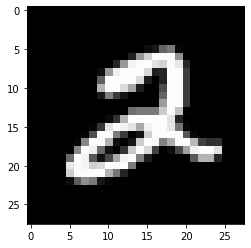

In [4]:
plt.imshow(x_train[5], cmap="gray")

In [5]:
## Preprocessing 
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
from tensorflow.keras.utils import plot_model
def simpleAutoEncoder():
	encoder_input = tf.keras.layers.Input(shape=(28,28,1),name="encoder_input")
	nn = tf.keras.layers.Flatten()(encoder_input)
	nn = tf.keras.layers.Dense(256,activation=tf.nn.relu)(nn)
	encoder_output = tf.keras.layers.Dense(32,activation=tf.nn.relu,name="encoder_output")(nn)

	decoder_input = tf.keras.layers.Dense(784,activation=tf.nn.relu)(encoder_output)
	decoder_output = tf.keras.layers.Reshape((28,28,1),name="decoder_output")(decoder_input)

	optimizer = tf.keras.optimizers.Adam(lr = 0.001)

	autoEncoder = tf.keras.Model(inputs=[encoder_input],outputs=[decoder_output])

	autoEncoder.compile(optimizer=optimizer,loss=tf.keras.losses.mean_squared_error,metrics=["mean_squared_error"])
	return autoEncoder

plot_model(simpleAutoEncoder())
autoencoderModel = simpleAutoEncoder()
autoencoderModel.fit(x_train,x_train,validation_split= 0.1,epochs=10,batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 80us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 2/10
54000/54000 [==============================] - 4s 69us/sample - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 3/10
54000/54000 [==============================] - 4s 68us/sample - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 4/10
54000/54000 [==============================] - 4s 68us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 5/10
54000/54000 [==============================] - 4s 69us/sample - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 6/10
54000/54000 [==============================] - 4s 68us/sample - loss: 0.0138 - mean_squared_err

In [8]:

print(f"Condensed To {32 / 784}")

Condensed To 0.04081632653061224


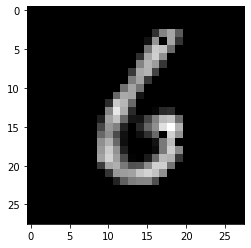

In [9]:
plt.imshow(autoencoderModel.predict(x_test[50].reshape(-1,28,28,1))[0],cmap="gray")

(28, 28)
(28, 28)


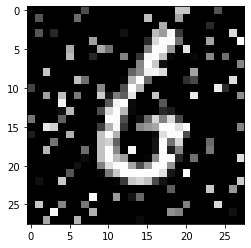

In [14]:
def add_noise(img):
	noisy = []
	print(img.shape)
	for row in img:
		new_pixel = []	
		for pixel in row:
			if np.random.choice( range(100)) <= 15:
				val = np.random.uniform(0, 1)
				new_pixel.append(val)
			else :
				new_pixel.append(pixel)
		noisy.append(new_pixel)
	noisy = np.array(noisy)
	print(noisy.shape)
	return noisy
noise_sample = add_noise(x_test[50].reshape(28,28))
plt.imshow(noise_sample,cmap="gray")

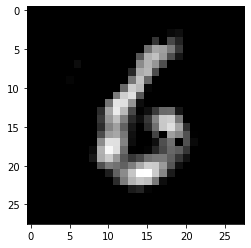

In [15]:
plt.imshow(autoencoderModel.predict(noise_sample.reshape(-1,28,28,1))[0],cmap="gray")

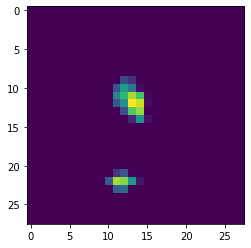

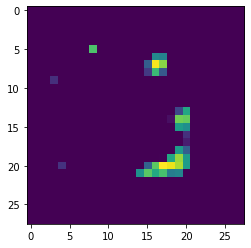

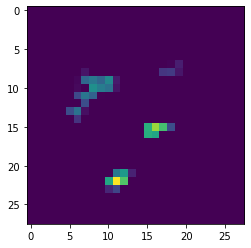

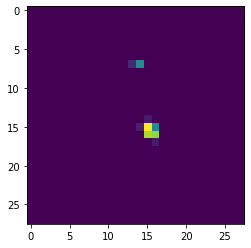

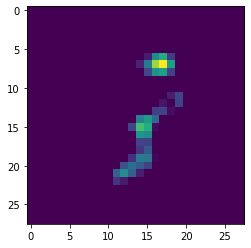

In [39]:
for i in range (5):
	plt.imshow(autoencoderModel.predict(np.random.normal(size=784).reshape(-1,28,28,1))[0])
	plt.show()